<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB 1.9 MB/s eta 0:00:01
     --------------------------------- ------ 41.0/48.7 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 409.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.0 MB 3.7 MB/s eta 0:01:44
   ---------------------------------------- 0.5/385.0 MB 6.0 MB/s eta 0:01:04
   ---------------------------------------- 0.8/385.0 MB 6.0 MB/s eta 0:01:05
   ---------------------------------------- 0.8/385.0 MB 6.0 MB/s eta 0:01:05
   ---------------------------------------- 1.6/385.0 MB 7.0 MB/s eta 0:00:55
   ---------------------------------------- 2.0/385.0 MB 7.0 MB/s eta 0:00:55
   ---------------------------------------- 2.4/385.0 MB 7.6 MB/s eta 0:00:51
   ---------------------------------------- 3.1/385.0 MB 8.2 MB/s eta 0

In [36]:
# insert code here
import tensorflow as tf
import keras
from keras.callbacks import TensorBoard

In [44]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# insert code here
# Check keras and tensorflow versions
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' 

print("Keras version: ", keras.__version__)

print("Tensorflow version: ", tf.__version__)

from keras.callbacks import TensorBoard

## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import MaxPool2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

Keras version:  3.5.0
Tensorflow version:  2.17.0


## Load data
Use the **Keras**' load method.

In [6]:
# insert code here
(train_images,train_labels),(test_images,test_labels)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 46s 0us/step


In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
train_labels.shape

(50000, 1)

In [9]:
test_images.shape

(10000, 32, 32, 3)

In [10]:
test_labels.shape

(10000, 1)

## Check some data

## Prepare data

In [11]:
X_train=train_images
t_train=train_labels
X_test=test_images
t_test=test_labels

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
# Prepare input data

_,img_rows,img_cols,img_channels= X_train.shape

#X_train=X_train.reshape(X_train.shape[0],img_cols,img_cols,1)

#output
#target= faces.target.astype(np.uint8)

y_train=to_categorical(
    t_train,
    num_classes= 10)
y_test=to_categorical(
    t_test,
    num_classes= 10)

# Optional: cast the result to uint8
y_train=y_train.astype('uint8')
y_test=y_test.astype('uint8')

In [29]:
img_channels

3

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [32]:
model = Sequential()

model.add(Conv2D(32,kernel_size=4, activation='relu',data_format='channels_last',padding='same', input_shape=(img_rows, img_cols, img_channels)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

## Compile the model

In [33]:
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,106 (625.41 KB)

 Trainable params: 160,106 (625.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

## Fit the training data

In [37]:
%%time
#fit model on training data 
history= model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size= 100)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5301 - loss: 1.3650 - val_accuracy: 0.5694 - val_loss: 1.6427
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6806 - loss: 0.9841 - val_accuracy: 0.6151 - val_loss: 1.5397
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7453 - loss: 0.7731 - val_accuracy: 0.6193 - val_loss: 1.7574
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7741 - loss: 0.6822 - val_accuracy: 0.6185 - val_loss: 1.7398
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.7825 - loss: 0.6485 - val_accuracy: 0.6238 - val_loss: 2.1295
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.7934 - loss: 0.6200 - val_accuracy: 0.6286 - val_loss: 1.8823
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8077 - loss: 0.5645 - val_accuracy: 0.6295 - val_loss: 2.0756
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.8080 - loss: 0.5637 - 

In [38]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

### TensorBoard
- TensorBoard is TensorFlow's visualization toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [41]:
%%time
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CPU times: total: 5.08 s
Wall time: 1.83 s


## Evaluate the model

In [42]:
# insert code here
score = model.evaluate(X_test,y_test,batch_size=10)
print ( "\nTest loss: %.6f, Test accuracy: %.6f" % tuple(score))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6162 - loss: 2.3235

Test loss: 2.362123, Test accuracy: 0.611500


## Visualization of cost

In [43]:
# insert code here

 

def print_cm(cm):

    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)

    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

## Results

In [45]:
# insert code here
# Convert predicted probabilities to class labels
predictions_class = np.argmax(predictions, axis=1)

# Convert y_test to class indices for comparison with predictions
y_test_target = np.argmax(y_test, axis = 1)

# Now use these class labels to compute the confusion matrix
cm = confusion_matrix(y_test_target, predictions_class)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 614  10  57 138  20   8  10  15  86  42 
  1|  14 697   6  81   4   1   7   4  35 151 
  2|  55   5 411 292  73  39  64  33  18  10 
  3|  12   7  45 635  51 115  58  44  15  18 
  4|  26   7  63 197 520  23  66  85   5   8 
  5|   8   2  38 385  43 421  31  60   3   9 
  6|   3   4  28 237  37  14 664   4   6   3 
  7|  11   1  18 174  52  49  12 671   3   9 
  8|  67  18  24  98   9   1   4   6 738  35 
  9|  31  53   6 100   2   7   7  20  30 744 


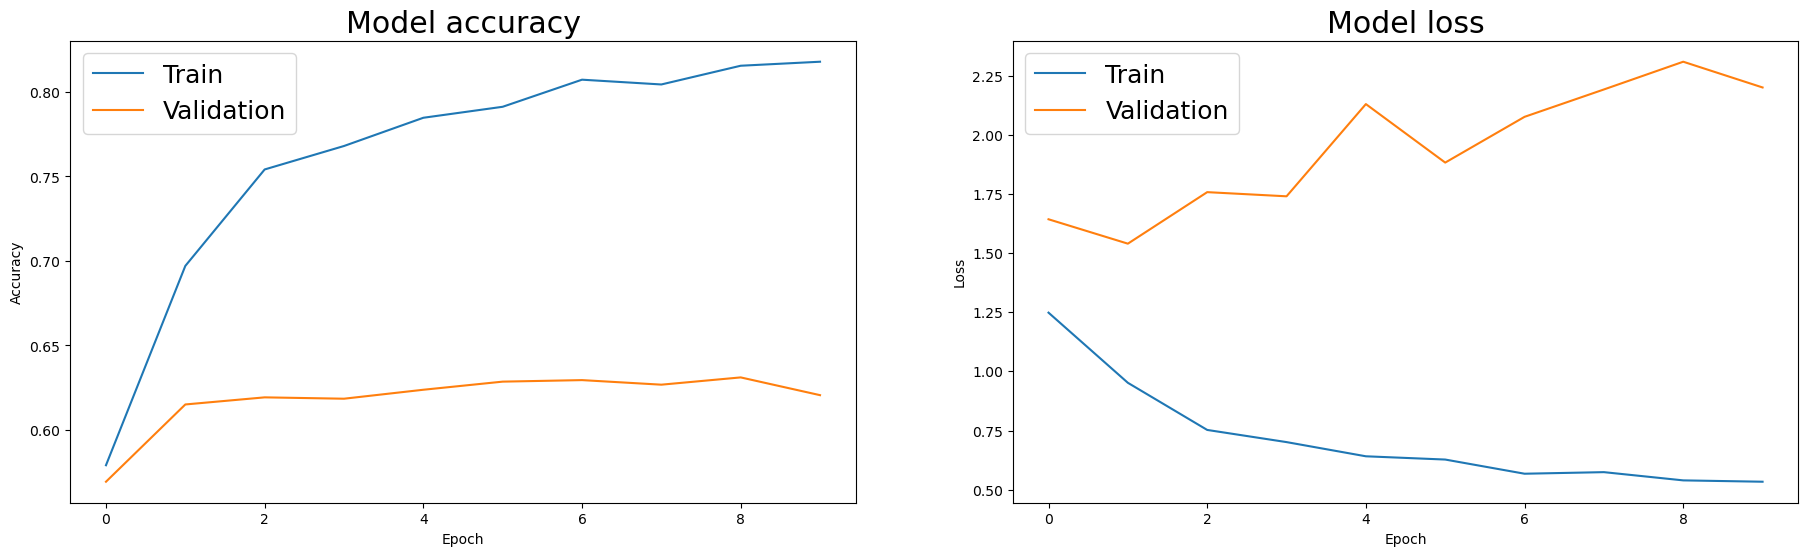

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
 
plt.rcParams.update({'font.size': 18})
 
# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])
 
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])
 
plt.show()



In [47]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')
 
    plt.rcParams.update({'font.size': 10})
 
    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]
 
        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

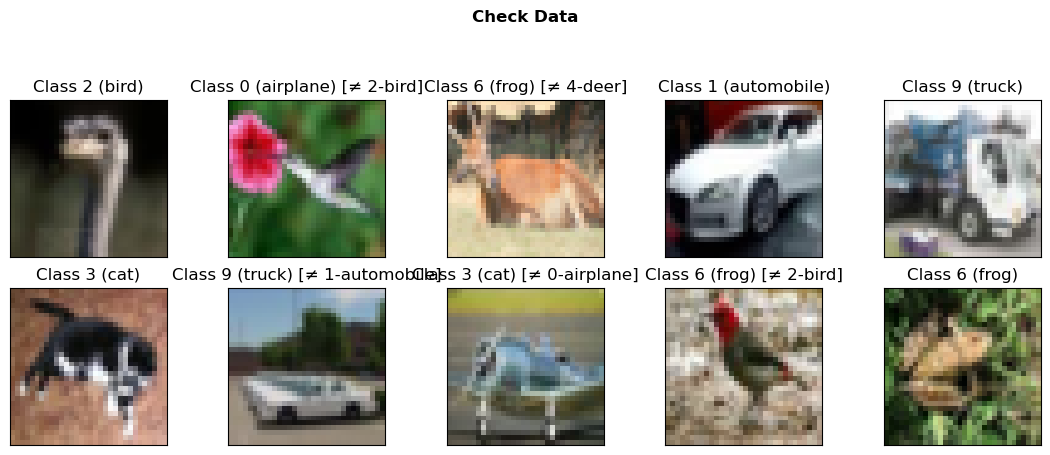

In [48]:
check_ten(X_test,predictions_class, y_test,True)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



